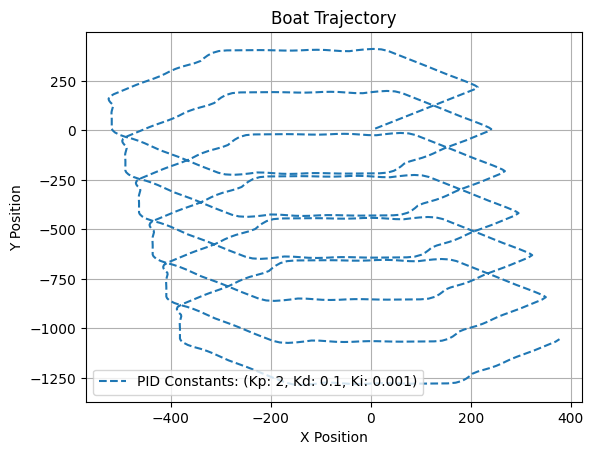

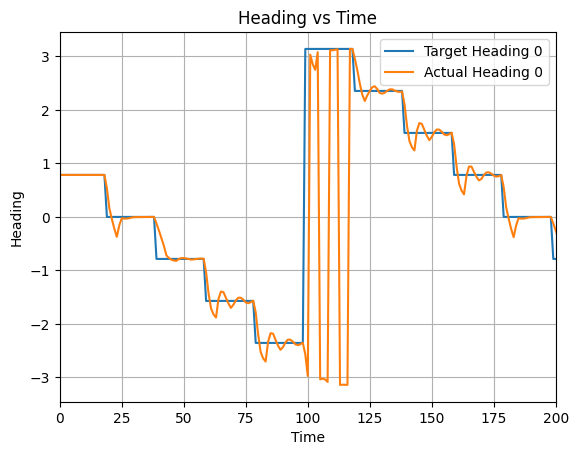

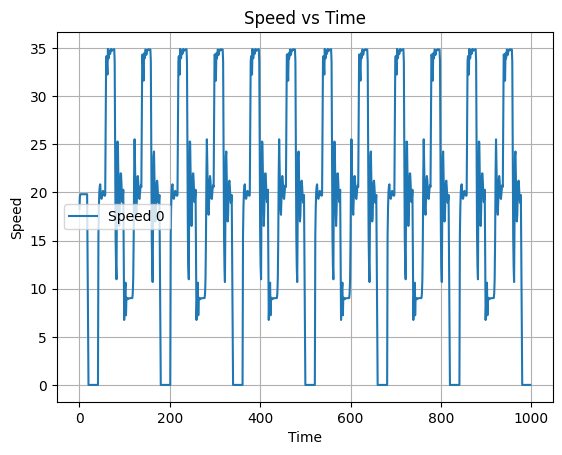

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from boat_simulation import Boat, PIDController, wrap_phase, angle_difference
# Simulation setup


# for inertia_factor in [0, 0.3, 0.9]:
target_heading_initial = np.pi / 4
# target_heading_final = -np.pi / 2

heading_inc = -np.pi / 4

# target_heading_initial = 0
# target_heading_final = np.pi / 2
wind_speed = 6.17  # m/s = 12kts
wind_angle = 0  # radians

# Simulation loop
headings = []
speeds = []

for pid_constants in [[2, 0.1, 0.001]]:
    target_heading = target_heading_initial
    trajectory = []
    headings.append([])
    speeds.append([])
    boat = Boat(mass=960+320, sail_area=67+25)
    boat.heading = target_heading_initial
    controller = PIDController(*pid_constants)
    dt = 5
    final = True
    for timestep in range(1, 1000):
        # if boat.y >= 50:
        #     target_heading = target_heading_final

        if timestep % 20 == 0:
            target_heading += heading_inc

        action = controller.step(boat.heading, target_heading, dt, -np.pi/2, np.pi/2)
        boat.step(wind_speed, wind_angle, action, dt)

        trajectory.append([boat.x, boat.y])
        headings[-1].append([target_heading, boat.heading, action])
        speeds[-1].append([boat.speed])

        # if boat.y > 300:
        #     break

    # Plotting the trajectory
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], '--', label=f'PID Constants: (Kp: {pid_constants[0]}, Kd: {pid_constants[1]}, Ki: {pid_constants[2]})')

plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Boat Trajectory')
plt.grid(True)
# plt.xlim([-200, 200])
# plt.ylim([-200, 200])
plt.show()

for i, h in enumerate(headings):
    h = wrap_phase(np.array(h))
    h = np.where(h > np.pi, h - 2 * np.pi, h)
    plt.plot(h[:, 0], label=f'Target Heading {i}')
    plt.plot(h[:, 1], label=f'Actual Heading {i}')
    # plt.plot(h[:, 2], label=f'Rudder Angle {i}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Heading')
plt.title('Heading vs Time')
plt.grid(True)
plt.xlim([0, 200])
plt.ylim([-1.1 * np.pi, 1.1 * np.pi])
plt.show()

for i, h in enumerate(speeds):
    h = np.array(h)
    plt.plot(h, label=f'Speed {i}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed vs Time')
plt.grid(True)
plt.show()


In [2]:
rudder_angle = np.pi/6

boat.rudder_angle = rudder_angle
boat.velocity = np.array([1, 0])
turning_torque = boat.calculate_torque()

turning_torque
# angular_acceleration = np.sign(rudder_angle) * turning_torque / boat.Iz

# angular_acceleration

# np.where(rudder_angle > np.pi, rudder_angle - 2 * np.pi, rudder_angle)

AttributeError: 'Boat' object has no attribute 'calculate_torque'